#Planning

**Step-1**: **Data Collecting and Understanding**
*          Install required libraries
*          Data recall
*         Creating initial concepts about the dataset
*         Identifying errors in the dataset. And preparing them for visualisation


**Step-2**: **Visualisation Part**

**Step-3**: **Preparing the dataset for Machine Learning**
*   Divide into train and test sets
*   Making Pipeline
*   Pipeline transformation for train and test datasets

**Step-4**: **Machine Learning**
*   Choosing a desired algorithm
*   Trainset training for each algorithms

**Step-5**: Model Evalution








#**Step-1**: Data Collecting and Understanding

##Install required libraries

In [39]:
import pandas as pd #pandas
import numpy as np #numpy

import matplotlib.pyplot as plt
import seaborn as sns
#maplotlib and seaborn for visualisation

import math #Math for some problem

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

# Installing all necessary libraries

##Data recall

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/Bank-Marketing-Campaign/main/data/train.csv") # Train set
test = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/Bank-Marketing-Campaign/main/data/test.csv") # Test set
train.sample(10) #Extract 10 arbitrary strings from train set

,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribe
16598,23050,42,unemployed,married,secondary,no,-395,no,no,NaN,4,aug,102,7,-1,0,NaN,no
16255,28997,46,retired,married,secondary,no,715,no,no,telephone,4,sep,196,1,176,1,success,no
3589,15175,45,self-employed,married,secondary,no,1387,no,no,cellular,7,jul,951,1,-1,0,NaN,yes
27492,16225,38,technician,married,tertiary,no,2463,yes,no,cellular,20,nov,143,1,330,3,other,yes
25065,12695,51,management,single,tertiary,no,2236,no,no,cellular,23,oct,182,1,185,1,success,no
2070,34362,50,technician,married,secondary,no,4777,yes,no,cellular,11,may,202,1,350,1,failure,no
30423,34707,58,services,married,secondary,no,762,no,no,cellular,21,nov,179,1,-1,0,NaN,no
11578,4554,30,management,single,tertiary,no,3950,yes,no,cellular,22,nov,165,1,-1,0,NaN,no
16922,17144,35,services,married,secondary,yes,166,yes,yes,NaN,8,may,227,2,-1,0,NaN,no
8449,40582,37,admin.,married,secondary,no,1513,no,no,cellular,6,apr,67,1,187,1,other,yes


We can conclude here
*   poutcome is mainly composed of nan values
*   The id column is not the column we need.
<br>

**They should be deleted**



---



---



---



 1 - age (numeric)
 <br>
 <br>
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
                                       <br>
                                       <br>
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   <br>
   <br>
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   <br>
   <br>
   5 - default: has credit in default? (binary: "yes","no")
   <br>
   <br>
   6 - balance: average yearly balance, in euros (numeric)
   <br>
   <br>
   7 - housing: has housing loan? (binary: "yes","no")
   <br>
   <br>
   8 - loan: has personal loan? (binary: "yes","no")
   <br>
   <br>
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
   <br>
   <br>
  10 - day: last contact day of the month (numeric)
  <br>
  <br>
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  <br>
  <br>
  12 - duration: last contact duration, in seconds (numeric)
  <br>
  <br>
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  <br>
  <br>
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  <br>
  <br>
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  <br>
  <br>
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br><br>
  Output variable (desired target):
  17 - subscribe - has the client subscribed a term deposit? (binary: "yes","no")

##Creating initial concepts about the dataset

In [3]:
print(train.shape)
print(test.shape)
print(train.info())

(34000, 18)
(8500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           34000 non-null  int64 
 1   age          34000 non-null  int64 
 2   job          33933 non-null  object
 3   marital      34000 non-null  object
 4   education    32141 non-null  object
 5   default      34000 non-null  object
 6   balance      34000 non-null  int64 
 7   housing      34000 non-null  object
 8   loan         34000 non-null  object
 9   contact      25271 non-null  object
 10  day_of_week  34000 non-null  int64 
 11  month        34000 non-null  object
 12  duration     34000 non-null  int64 
 13  campaign     34000 non-null  int64 
 14  pdays        34000 non-null  int64 
 15  previous     34000 non-null  int64 
 16  poutcome     8529 non-null   object
 17  subscribe    34000 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.7+ 

In [4]:
train.describe()

,id,age,balance,day_of_week,duration,campaign,pdays,previous
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,21243.424176,40.645382,1259.657676,14.449059,255.702735,2.393529,55.659765,0.755176
std,12269.761580,11.265680,2150.961113,8.256480,236.666462,2.886270,107.219341,1.876116
min,0.000000,18.000000,-4873.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,10600.750000,32.000000,89.000000,7.000000,124.000000,1.000000,-1.000000,0.000000
50%,21234.500000,38.000000,580.000000,14.000000,182.000000,1.000000,-1.000000,0.000000
75%,31867.250000,49.000000,1728.250000,20.000000,292.000000,2.000000,88.000000,1.000000
max,42499.000000,94.000000,30623.000000,31.000000,2211.000000,30.000000,383.000000,13.000000


In [5]:
print(train.isna().sum())
print("")
print(test.isna().sum())


id                 0
age                0
job               67
marital            0
education       1859
default            0
balance            0
housing            0
loan               0
contact         8729
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       25471
subscribe          0
dtype: int64

id                0
age               0
job              13
marital           0
education       501
default           0
balance           0
housing           0
loan              0
contact        2142
day_of_week       0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome       6337
dtype: int64


##Identifying errors in the dataset. And preparing them for visualisation

###The first thing to do. Delete unnecessary and columns with many nan values

In [6]:
train.drop(['id', 'poutcome'], axis=1, inplace=True)
test.drop(['id', 'poutcome'], axis=1, inplace=True)

#dropna

###Fill in the values in other columns in fillna form

In [7]:
train['job'].fillna(train['job'].mode()[0], inplace=True)
train['education'].fillna(train['education'].mode()[0], inplace=True)
train['contact'].fillna(train['contact'].mode()[0], inplace=True)
test['job'].fillna(test['job'].mode()[0], inplace=True)
test['education'].fillna(test['education'].mode()[0], inplace=True)
test['contact'].fillna(test['contact'].mode()[0], inplace=True)

#filling job, education, contact columns with the most attended values using fillna

filling job, education, contact columns with the most attended values using fillna

#Step-2: Visualisation Part for those approved

In [8]:
train_approved = train[train["subscribe"]=='yes']

##Distribution of age

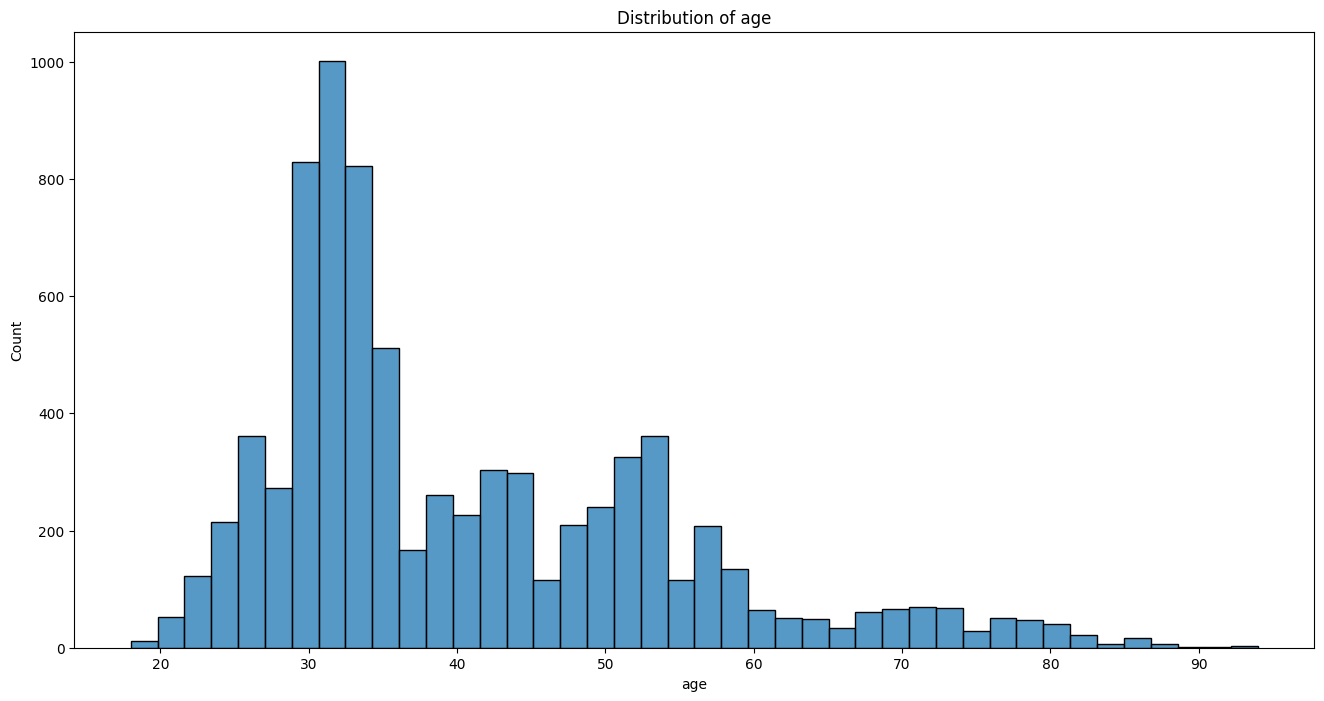

In [9]:

plt.figure(figsize=(16, 8))
sns.histplot(train_approved['age'])
plt.title('Distribution of age')
plt.show()




*   There is a problem with bias in the dataset representing the validations
*   Those confirmed are mostly in their 30-32s



##Barplot of Marital Status

<ipython-input-10-7de9746f9fb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_marital.index, y=count_marital.values, palette="Set2")


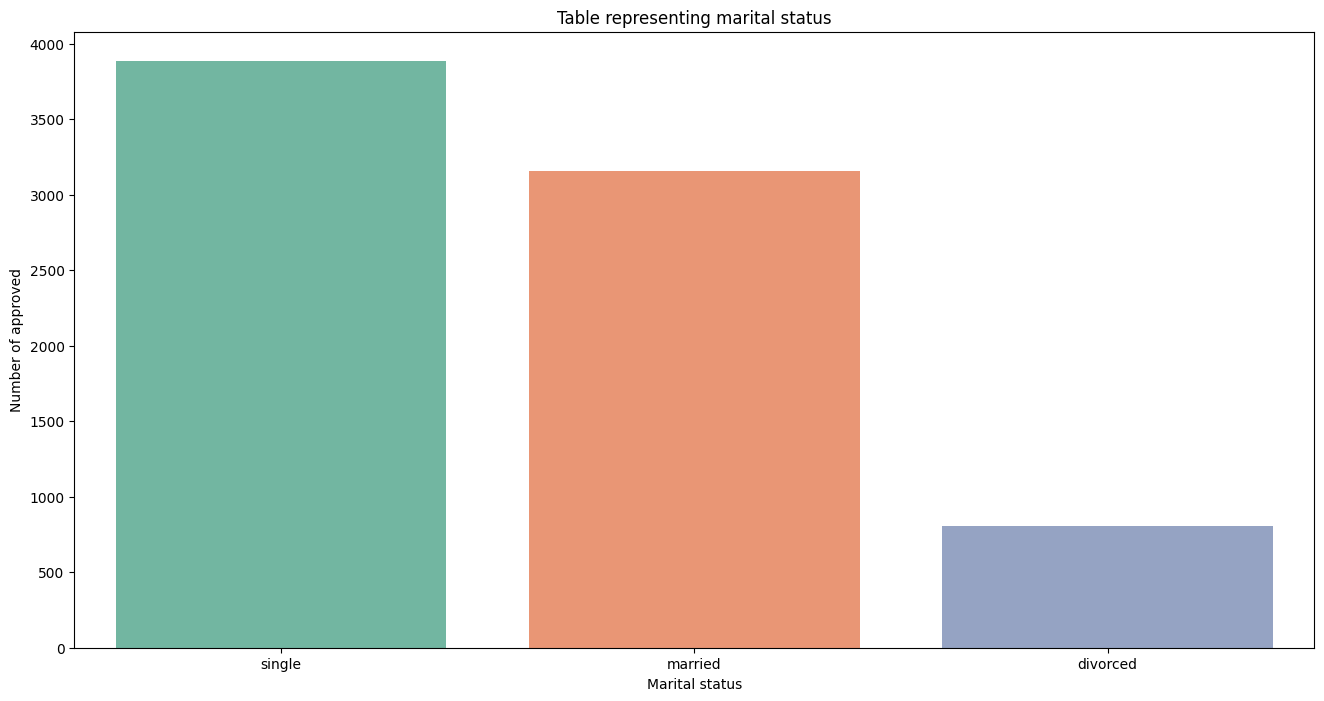

In [10]:

count_marital = train_approved.marital.value_counts()
plt.figure(figsize=(16, 8))
sns.barplot(x=count_marital.index, y=count_marital.values, palette="Set2")
plt.title("Table representing marital status")
plt.xlabel("Marital status")
plt.ylabel("Number of approved")
plt.show()

##Piechart of Education status

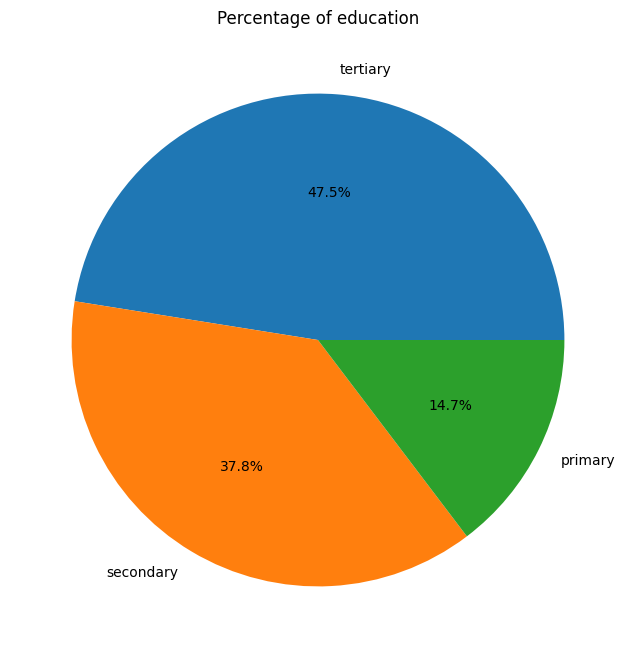

In [11]:

count_education = train_approved.education.value_counts()
plt.figure(figsize=(16, 8))
plt.pie(count_education.values, labels=count_education.index, autopct='%1.1f%%')
plt.title('Percentage of education')
plt.show()


Most of those confirmed are tertiary human beings

##Piechart of approved customers

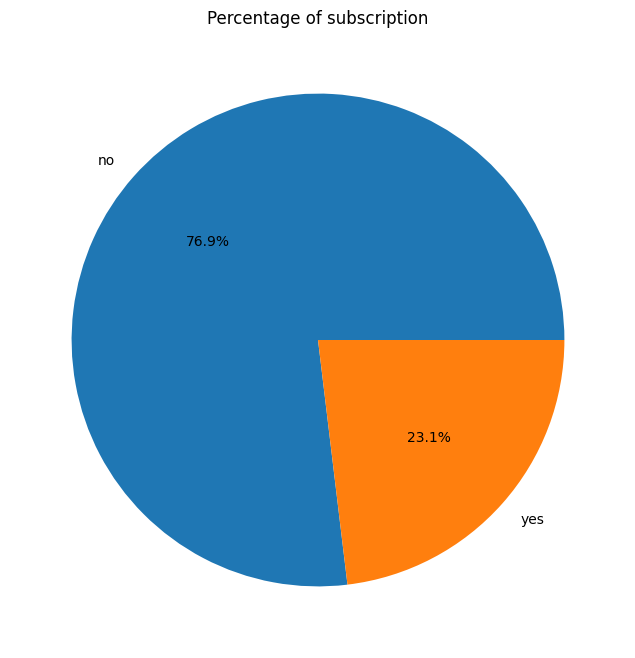

In [12]:
count_subscribe = train.subscribe.value_counts()
plt.figure(figsize=(16, 8))
plt.pie(count_subscribe.values, labels=count_subscribe.index, autopct='%1.1f%%')
plt.title('Percentage of subscription')
plt.show()




---



That's enough

#**Step-3**: Preparing the dataset for Machine Learning

##Divide into train and test sets

In [24]:
data = train.copy()
data['subscribe'].replace({'no':0, "yes":1},inplace=True)
data_train, data_test = train_test_split(data, test_size=0.2, random_state=2)

In [28]:
#For Machine Learning, we can separate x and y
x = data_train.drop('subscribe',axis=1)
y = data_train['subscribe']

#For data_test set
x_test = data_test.drop('subscribe',axis=1)
y_test = data_test['subscribe']

31267    0
14378    0
4114     0
2758     0
18077    0
        ..
31319    0
8804     1
9188     1
5805     0
20432    1
Name: subscribe, Length: 6800, dtype: int64

##Making Pipeline

separate object and number columns

In [29]:
object_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays']
num_cols = ['age', 'balance', 'duration']


###Pipeline

In [30]:
# create a pipeline for one-hot encoding the object columns
object_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create a pipeline for min-max scaling the numeric columns
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# create a column transformer to combine the two pipelines
column_transformer = ColumnTransformer([
    ('objects', object_pipeline, object_cols),
    ('nums', num_pipeline, num_cols)
])


##Pipeline transformation for train and test datasets

In [31]:
x_pre = column_transformer.fit_transform(x) #Train dataset
x_acc_pre = column_transformer.transform(x_test) #Test set for determining accuracy
x_test_pre = column_transformer.transform(test) #

#Step-4: Machine Learning

##Choosing a desired algorithm

These algorithms were selected:

*   Logistic Regression
*   DecisionTreeClassifier
*   RandomForestClassifier
*   Naive Bayes:
*   Gradient Boosting
*   Neural Networks (Deep Learning)



In [32]:
#Logistic Regression
logreg_model = LogisticRegression()

#DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

#RandomForestClassifier
rf_model = RandomForestClassifier()

#Naive Bayes:
GNB_model = GaussianNB()

#Gradient Boosting
GB_model = GradientBoostingClassifier()

#Neural Networks (Deep Learning)
dl_model = MLPClassifier()

##Trainset training for each algorithms

In [36]:
logreg_model.fit(x_pre,y) #Linear Model
dt_model.fit(x_pre,y) #Decition Tree Model
rf_model.fit(x_pre,y) #Random Forest Classifier Model

GB_model.fit(x_pre,y) #GradientBoostingClassifier Model
dl_model.fit(x_pre,y) #Deep Learning Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

#Step-5: Model Evalution

Predicting x_acc_pre via all models

In [54]:

df_pred = pd.DataFrame()
df_pred['Logistic Regression'] = logreg_model.predict(x_acc_pre)
df_pred['Decision Tree'] = dt_model.predict(x_acc_pre)
df_pred['Random Forest'] = rf_model.predict(x_acc_pre)
df_pred['Gradient Boosting'] = GB_model.predict(x_acc_pre)
df_pred['Deep Learning'] = dl_model.predict(x_acc_pre)
df_pred['REAL'] = y_test.values
df_pred

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,Deep Learning,REAL
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
6795,0,1,0,0,0,0
6796,1,1,1,1,0,1
6797,1,1,1,1,1,1
6798,0,0,0,0,0,0


###HEATMAP

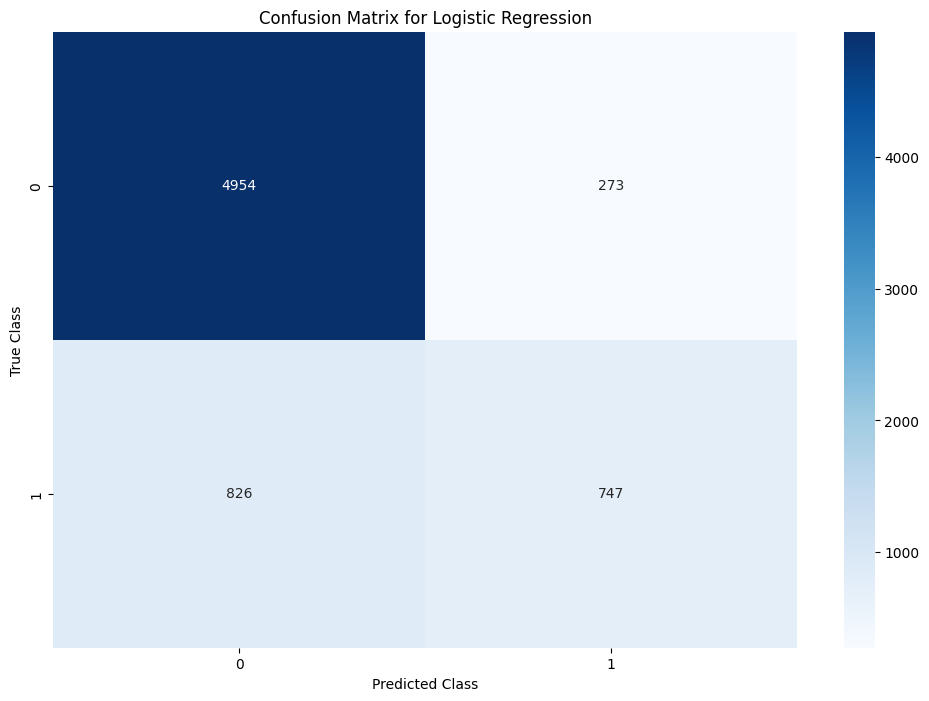

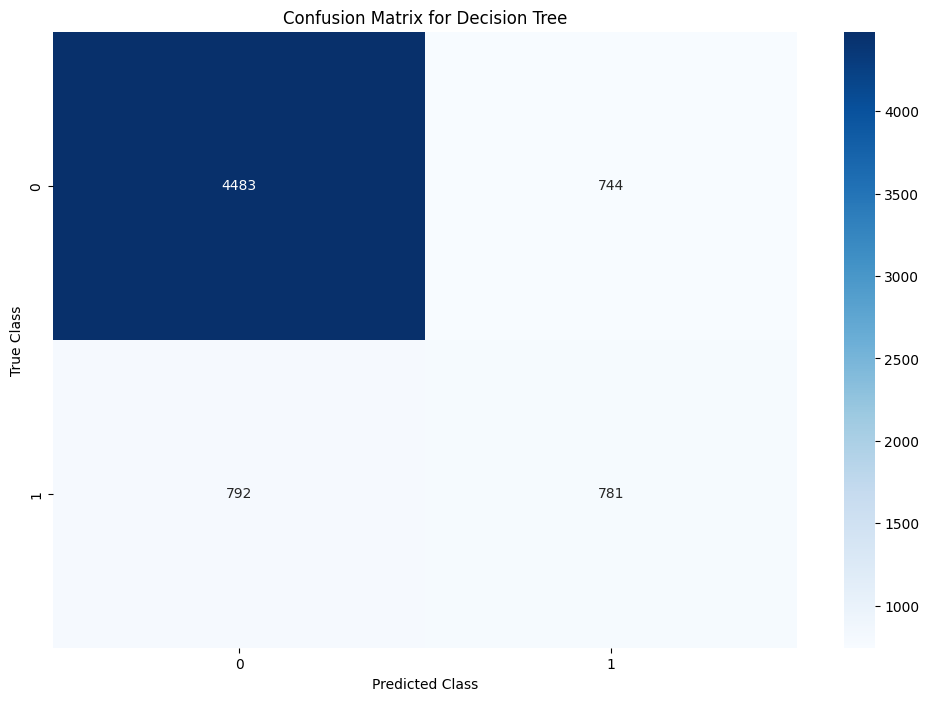

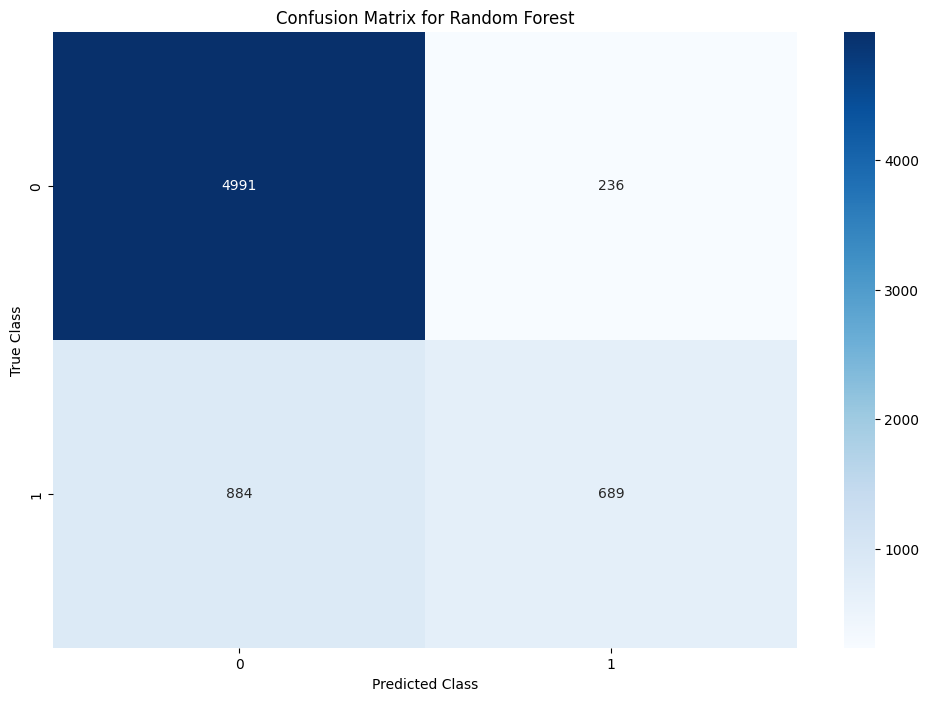

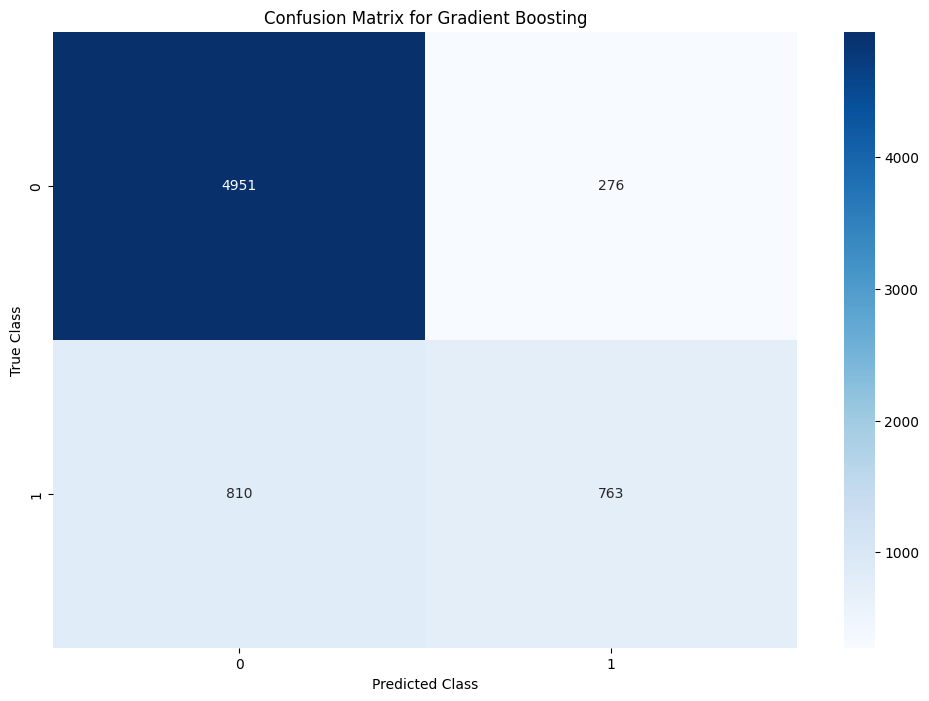

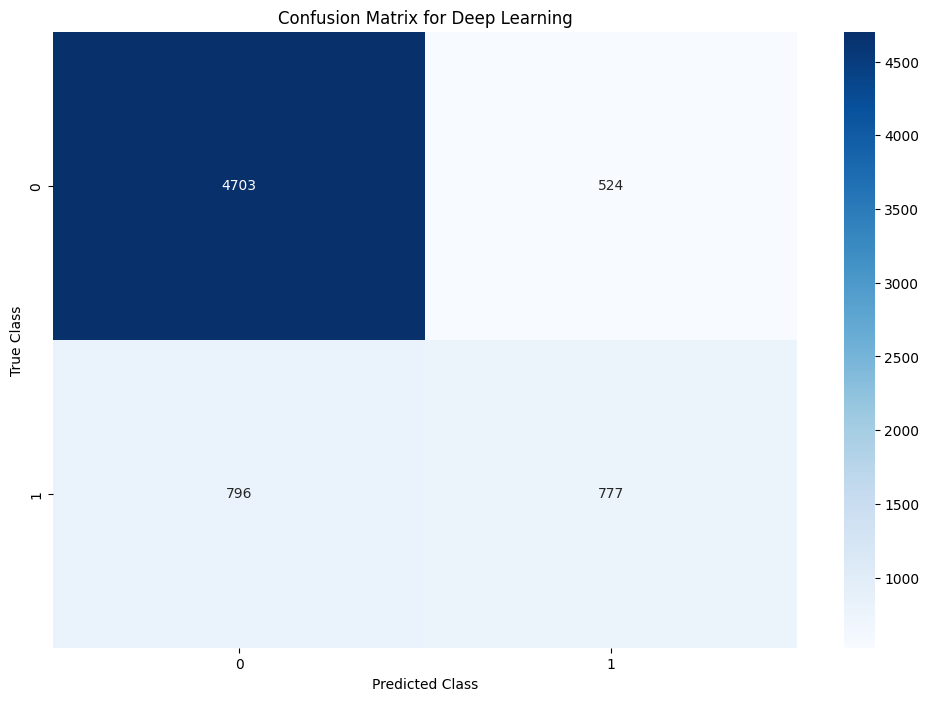

In [55]:

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Logistic Regression']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Confusion Matrix for Decision Tree
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Decision Tree']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Random Forest']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Gradient Boosting']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# Confusion Matrix for Deep Learning
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Deep Learning']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Deep Learning')
plt.show()


###accuracy percentages of each predictions

In [56]:
print("Accuracy of Logistic Regression: ", accuracy_score(df_pred['REAL'], df_pred['Logistic Regression']))
print("Accuracy of Decision Tree: ", accuracy_score(df_pred['REAL'], df_pred['Decision Tree']))
print("Accuracy of Random Forest: ", accuracy_score(df_pred['REAL'], df_pred['Random Forest']))
print("Accuracy of Gradient Boosting: ", accuracy_score(df_pred['REAL'], df_pred['Gradient Boosting']))
print("Accuracy of Deep Learning: ", accuracy_score(df_pred['REAL'], df_pred['Deep Learning']))


Accuracy of Logistic Regression:  0.8383823529411765
Accuracy of Decision Tree:  0.7741176470588236
Accuracy of Random Forest:  0.8352941176470589
Accuracy of Gradient Boosting:  0.8402941176470589
Accuracy of Deep Learning:  0.8058823529411765


#SUBMISSION

In [60]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous
0,41,self-employed,married,tertiary,no,203,no,no,cellular,29,jan,54,1,-1,0
1,29,technician,single,secondary,no,-114,yes,yes,cellular,14,may,182,2,-1,0
2,44,services,married,secondary,no,548,no,no,cellular,14,jul,406,2,-1,0
3,33,unemployed,single,tertiary,no,2101,yes,no,cellular,14,feb,203,2,180,1
4,57,housemaid,married,secondary,no,2559,no,yes,telephone,8,jul,112,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,32,technician,married,tertiary,no,3836,yes,no,cellular,29,may,234,5,-1,0
8496,31,technician,single,secondary,no,542,no,yes,cellular,6,aug,202,4,-1,0
8497,60,services,married,secondary,no,16972,no,no,cellular,5,nov,287,1,185,6
8498,54,retired,married,primary,no,5,no,no,cellular,23,aug,332,1,-1,0


##USING Gradient Boosting for submission

In [95]:
df = pd.DataFrame(columns=['id', 'subscribe'])
df['id'] = range(0, 8500)
df['subscribe'] = GB_model.predict(x_test_pre)
df['subscribe'].replace({0:"no",1:"yes"},inplace=True)
df.to_csv("submission_last.csv",index=False)